In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

In [56]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return 1
    
first_prior = np.vectorize(uniform_prior)
    

def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    
    sigma = 0.03
    mu = 0.5
    
    return (1/sigma*np.sqrt(2*np.pi)) * np.exp(-((H - mu) ** 2) / (2 * sigma**2))

second_prior = np.vectorize(gaussian_prior)


def third_prior(H):
    a, b = 0.5, 0.5

    return (H ** (a - 1)) * ((1 - H) ** (b - 1))


third_prior = np.vectorize(third_prior)


In [57]:
second_prior(0.4)

array(0.32301416)

### Bonus point

Why do we need to use np.vectorize here?

it is used for loops.when we dont want to do an operation on just one number. it helps us to do the operation on every element.

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [58]:
H = np.linspace(0, 1, 1000, dtype=np.float128)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in longdouble_scalars


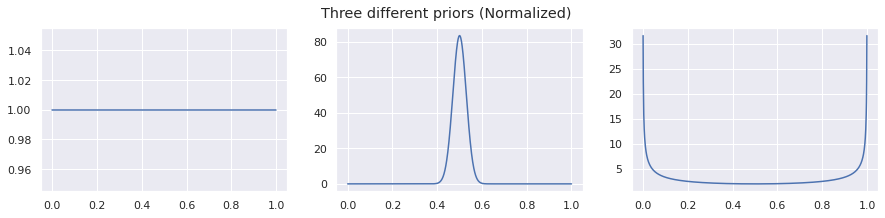

In [59]:
plt.figure(figsize=(15, 3))
plt.suptitle('Three different priors (Normalized)')

plt.xlim(0, 1)
plt.subplot(1, 3, 1)
plt.plot(H,first_prior(H))

plt.subplot(1, 3, 2)
plt.plot(H, second_prior(H))

plt.subplot(1, 3, 3)
plt.plot(H, third_prior(H))

plt.show()

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

dar gesmat gabl ba distribution beta(third_prior) zamani ke H=0 ya H=1 be third_prior midahim agar data type ma float bashad error midahad ke nemitavan meghdar 0 ra be tavan manfi resand chon dar rabate beta ma baray H=0 ebarat H^(-0.5) ra darim va baray H=1 ma ebarat (1-H)^(-0.5) ra darim ama agar data type ma float 128 bashad in moshkel pish nemiayad. agar bekhahim in moshkel bedon estefadeh az data type float.128 pish nayayad bayad H ra mahdod konim ke 0 ya 1 nashavad balkeh nazdik be in adad bashad.

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot. 

In [60]:
data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(i)) for i in range(4)]  
data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(2**i)) for i in range(2, 13)])

In [73]:
def normalize(func) :
  for i in range(len(func)):
    norm = func[i]=func[i]/np.max(func[i])

  return norm


In [96]:
# posterior has binomial distribution for coin toss (head or tail, in other words 0 or 1)
prior = [first_prior, second_prior, third_prior]
def posterior(H,data):
    ones = np.count_nonzero(data == 1)
    zeros = np.size(ones) - np.count_nonzero(data == 0)
    likelihood = np.power((1-H),zeros)*np.power(H,ones)
    new_prior = prior*likelihood

    return normalize(new_prior)

ValueError: ignored

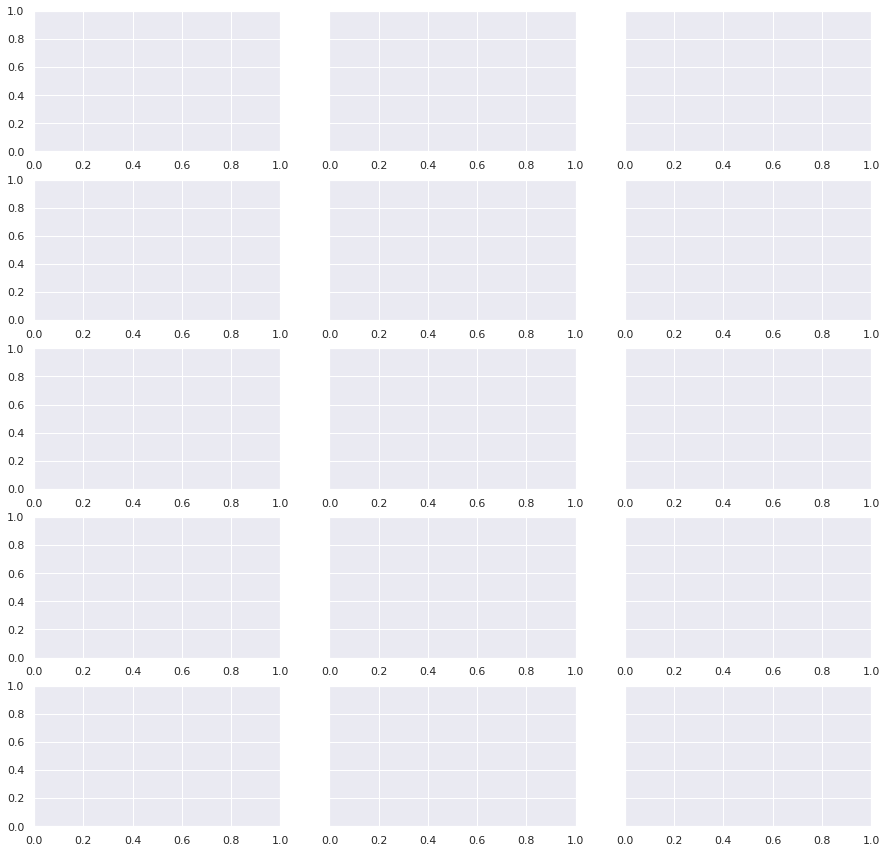

In [97]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15), sharey=True)
for i in range(15):
  graph = posterior(H,data[i])


plt.plot(graph)    
plt.tight_layout(h_pad=3)
plt.show()

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [ ]:
def raw_moments(dist, r):
    return np.power(dist, r).mean()

## (b)

Write a function to calculate central moments of a given distribution

In [ ]:
def central_moments(dist, r):

    return np.power(dist - dist.mean(), r).mean()

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [ ]:
binomial = np.random.binomial(30, 0.7, size=10 ** 6)
poisson = np.random.poisson(2.1, size=10 ** 6)
gaussian = np.random.normal(2.1, 0.3, 10**6)

print('binomial')
for r in range(1, 4):
    print(f"r={r} raw moments = {raw_moments(binomial, r)} , central moments = {central_moments(binomial, r)}")

print(" * " * 30)
print('poisson')
for r in range(1, 4):
    print(f"r={r} raw moments = {raw_moments(poisson, r)} , central moments = {central_moments(poisson, r)}")

print(" * " * 30)
print('gaussian')
for r in range(1, 4):
    print(f"r={r} raw moments = {raw_moments(gaussian, r)} , central moments = {central_moments(gaussian, r)}")

    

binomial
r=1 raw moments = 20.999472 , central moments = -8.042206900427118e-16
r=2 raw moments = 447.289566 , central moments = 6.311741721215997
r=3 raw moments = 9655.421586 , central moments = -2.509618200966409
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
poisson
r=1 raw moments = 2.101119 , central moments = -2.6862778668146347e-16
r=2 raw moments = 6.509539 , central moments = 2.094837947839
r=3 raw moments = 24.564543 , central moments = 2.0842192976079357
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
gaussian
r=1 raw moments = 2.0998857342876716 , central moments = -3.7485392567759844e-16
r=2 raw moments = 4.499246939469267 , central moments = 0.08972684240439334
r=3 raw moments = 9.82467345947618 , central moments = -6.323644812434915e-05


## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [ ]:
from scipy import stats

In [ ]:
print('binomial')
for r in range(1, 4):
    print(f"r={r} moment = {stats.moment(binomial, r)}")

print(" * " * 30)
print('poisson')
for r in range(1, 4):
    print(f"r={r} moment = {stats.moment(poisson, r)}")

print(" * " * 30)
print('gaussian')
for r in range(1, 4):
    print(f"r={r}  moment = {stats.moment(gaussian, r)}")


    

binomial
r=1 moment = 0.0
r=2 moment = 6.311741721215997
r=3 moment = -2.509618200966409
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
poisson
r=1 moment = 0.0
r=2 moment = 2.094837947839
r=3 moment = 2.0842192976079357
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
gaussian
r=1  moment = 0.0
r=2  moment = 0.08972684240439334
r=3  moment = -6.32364481243491e-05


# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [ ]:
from pandas import DataFrame, read_csv
import pandas as pd

In [ ]:
link = 'https://raw.githubusercontent.com/SBUDataAnalysis/hw3-saraghl/main/data.txt'
data =  pd.read_csv(link, encoding='latin-1',delimiter="\t")
data

,# time passed,number of events
0,7.5,232.0
1,15.0,240.0
2,22.5,245.0
3,30.0,226.0
4,37.5,223.0
...,...,...
2043,15330.0,265.0
2044,15337.5,220.0
2045,15345.0,252.0
2046,15352.5,229.0


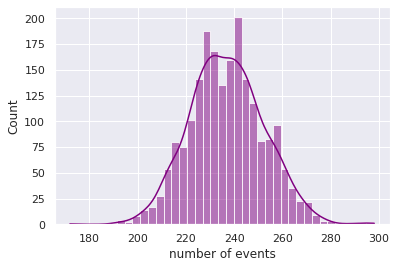

In [30]:
sns.set_theme()
sns.histplot(data.iloc[:,1], kde = True, color = 'purple');

## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

In [ ]:
sum_decays, avgs_decays = [], []
for i in range(1, len(data)+1):
    sum_decays.append(data.iloc[:i]['number of events'].sum())
    avgs_decays.append(data.iloc[:i]['number of events'].mean())

new_data = DataFrame({
    'total number of decays': sum_decays,
    'average number of decays': avgs_decays
})
new_data.to_csv('new_data.txt', index=False)
new_data

,total number of decays,average number of decays
0,232.0,232.000000
1,472.0,236.000000
2,717.0,239.000000
3,943.0,235.750000
4,1166.0,233.200000
...,...,...
2043,484278.0,236.926614
2044,484498.0,236.918337
2045,484750.0,236.925709
2046,484979.0,236.921837


## (c)

Use a unifor prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.